
# hate speech detection


### Install and import necessary packages

In [21]:

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


# Load data

In [22]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!ls '/content/drive/MyDrive/latsis'
df_train = pd.read_csv('/content/drive/MyDrive/latsis/train.csv')
extra_data = pd.read_csv('/content/drive/MyDrive/latsis/dev.csv')
df_extra = pd.read_parquet('/content/drive/MyDrive/latsis/german_datasets.parquet')
#df_test = pd.read_csv('/content/drive/MyDrive/latsis/test.csv')

Mounted at /content/drive
dev.csv  german_datasets.parquet  train.csv


### split train/val set

In [23]:
#convert to string

extra_data["text"] = extra_data["text"].astype(str)
df_train["text"] = df_train["text"].astype(str)
df_dev["text"] = df_dev["text"].astype(str)

#merge train and dev
full = pd.concat([df_train, df_dev])

#split train and test
df_train, df_dev = train_test_split(full, test_size=0.2, random_state=42)

train, dev = train_test_split(full, test_size=0.2, random_state=42)
train = shuffle(train, random_state = 42)
dev = shuffle(dev, random_state = 42)

## ML approaches
### tf-idf

In [30]:
from zmq.constants import XPUB_NODROP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
#tf-idf
vectorizer = TfidfVectorizer()
scaler =  StandardScaler(with_mean=False)

# Fit the tfidf model
vectorizer = vectorizer.fit(train['text'])

x_train = vectorizer.transform(train['text'])
x_dev = vectorizer.transform(dev['text'])
y_train = train['label']
y_dev = dev['label']

# Fit the scaler
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)

print("X_train shape is {}".format(x_train.shape))
print("X_dev shape is {}".format(x_dev.shape))

X_train shape is (8663, 23849)
X_dev shape is (2166, 23849)


### models fit

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test f1 score : 0.8226589169807521 
Test accuracy score : 0.8231763619575254 


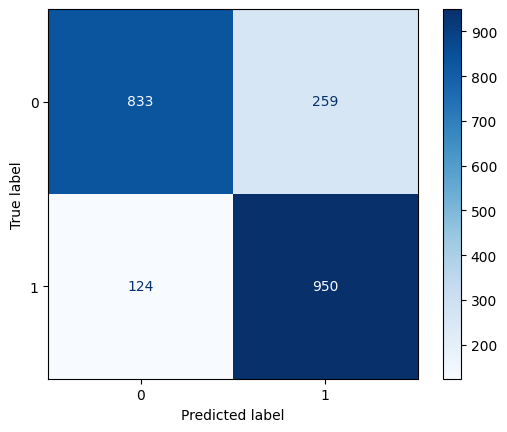

In [33]:
# SVM model

from sklearn.svm import LinearSVC
from joblib import dump, load
import matplotlib.pyplot as plt

# define model
model = LinearSVC(class_weight='balanced', random_state=42)

model.fit(x_train, y_train)
from sklearn.metrics import f1_score, accuracy_score

# Plotting scores
y_pred = model.predict(x_dev)

f1 = f1_score(y_dev, y_pred, average="macro")
print("Test f1 score : %s "% f1)

acc = accuracy_score(y_dev, y_pred)
print("Test accuracy score : %s "% acc)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_dev, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap=plt.cm.Blues)
plt.show()